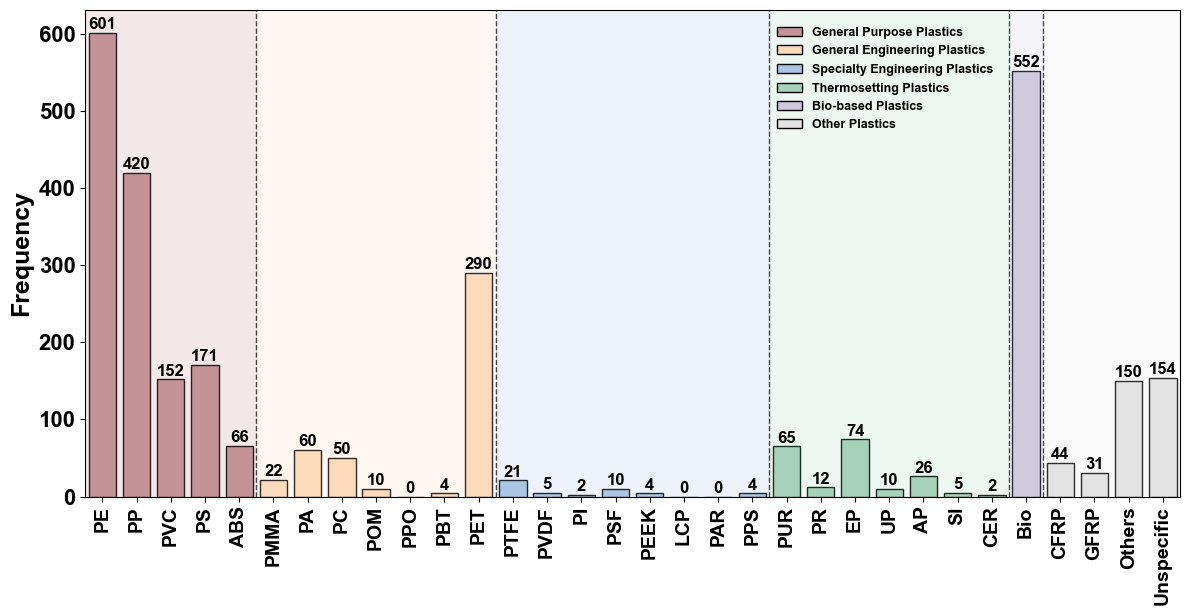

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches 


df = pd.read_excel('RESULT_FINAL6.xlsx', sheet_name='Resin_types_result') 
data = df['Count1']  
labels = df['Category1']


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'  


colors = []
for i in range(len(data)):
    if 1 <= i + 1 <= 5:  
        colors.append((195 / 255, 147 / 255, 152 / 255))  
    elif 6 <= i + 1 <= 12:  
        colors.append((252 / 255, 218 / 255, 186 / 255))
    elif 13 <= i + 1 <= 20: 
        colors.append((171 / 255, 198 / 255, 228 / 255)) 
    elif 19 <= i + 1 <= 27:  
        colors.append((167 / 255, 210 / 255, 186 / 255))  
    elif i+1== 28: 
        colors.append((208 / 255, 202 / 255, 222 / 255))  
    else:
        colors.append((227 / 255, 227 / 255, 227 / 255))

fig, ax = plt.subplots(figsize=(12, 6.25)) 
x_positions = range(len(labels))
bars = ax.bar(x_positions, data, color=colors, edgecolor='Black', alpha=1)
fig.patch.set_alpha(0)  
ax.patch.set_alpha(0) 
for idx, value in enumerate(data):
    ax.text(idx, value + 1, f'{round(value)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=90, fontsize=14) 
ax.tick_params(axis='y', labelsize=16)  
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Frequency', fontsize=18, fontweight='bold')

extra_padding = 0.5 
plt.xlim(-extra_padding, len(data) - 1 + extra_padding)  
legend_labels = [
    'General Purpose Plastics',
    'General Engineering Plastics',
    'Specialty Engineering Plastics',
    'Thermosetting Plastics',
    'Bio-based Plastics',
    'Other Plastics'
]
legend_colors = [
    (195 / 255, 147 / 255, 152 / 255),  
    (252 / 255, 218 / 255, 186 / 255),  
    (171 / 255, 198 / 255, 228 / 255),  
    (167 / 255, 210 / 255, 186 / 255),  
    (208 / 255, 202 / 255, 222 / 255),  
    (227 / 255, 227 / 255, 227 / 255)
]
patches = [mpatches.Patch(facecolor=color, label=label, edgecolor='black') for color, label in zip(legend_colors, legend_labels)]
ax.legend(handles=patches, loc='upper right', bbox_to_anchor=(0.84, 0.99),fontsize=9, frameon=False)

boundaries = [0, 5, 12, 20, 27, 28,len(data)]
for boundary in boundaries[1:-1]:
    ax.axvline(x=boundary - 0.5, color='black', linestyle='--', linewidth=1, alpha=0.7)

ax.grid(False)

background_colors = legend_colors
for i in range(len(boundaries) - 1):
    ax.axvspan(boundaries[i] - 0.5, boundaries[i + 1] - 0.5, color=background_colors[i], alpha=0.2)

plt.tight_layout()  
plt.savefig('resin_types.png', dpi=300, bbox_inches='tight')  
plt.show()

